In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle
from scipy.constants import c as speed_of_light
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

In [43]:
def total_flux(wl, flux_nu):
    """
    Calculate the total flux over the wavelengths and returns the flux in erg cm^-2 s^-1
    """
    flux_lambda = (speed_of_light * 100 / ((wl * 1e-4) ** 2)) * flux_nu * 1e-23
    tot_flux = np.trapezoid(flux_lambda, (wl * 1e-4))
    return tot_flux

In [45]:
with open('FLiTsData1000.pkl', 'rb') as f:
    df = pickle.load(f)

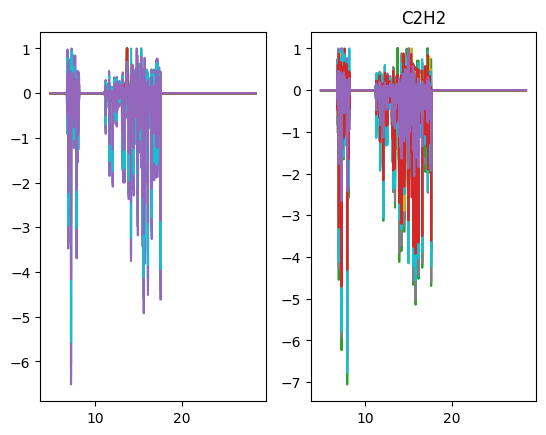

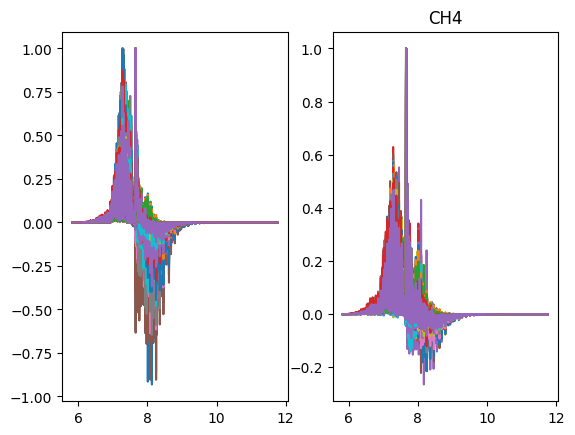

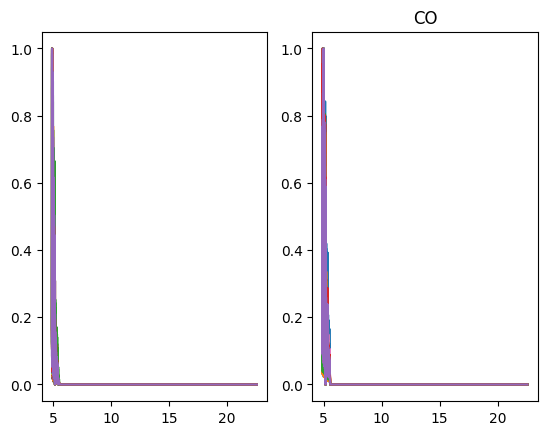

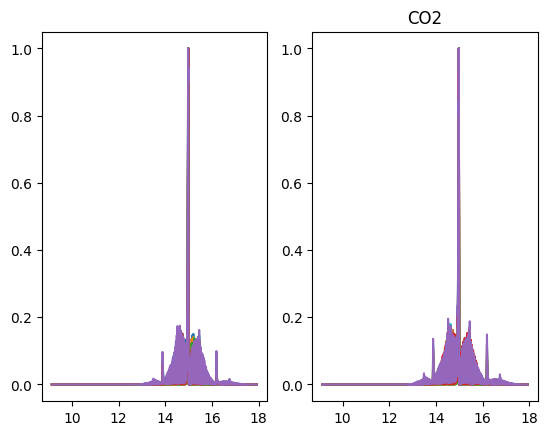

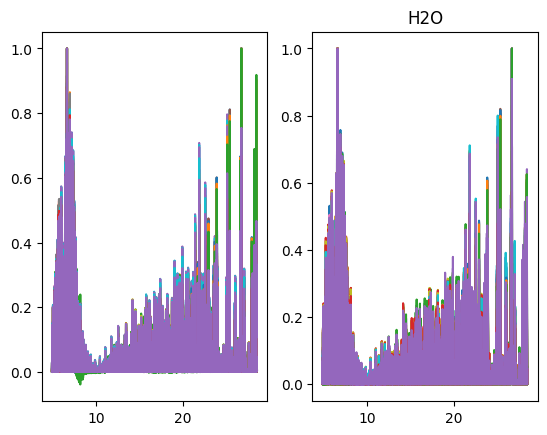

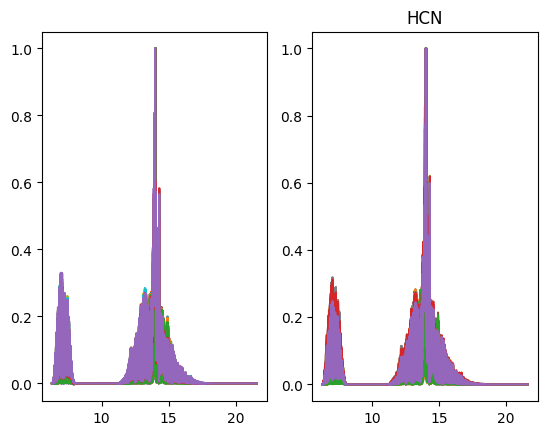

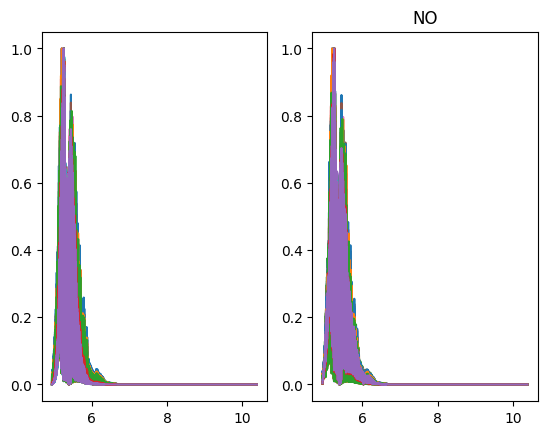

C:\Users\Niels de Klerk\AppData\Local\Temp\ipykernel_23804\1176519667.py:8: RuntimeWarning: invalid value encountered in divide
  axes[0].plot(specie_wl, specie_flux/max(specie_flux))
C:\Users\Niels de Klerk\AppData\Local\Temp\ipykernel_23804\1176519667.py:12: RuntimeWarning: invalid value encountered in divide
  axes[1].plot(specie_wl, specie_flux/max(specie_flux))


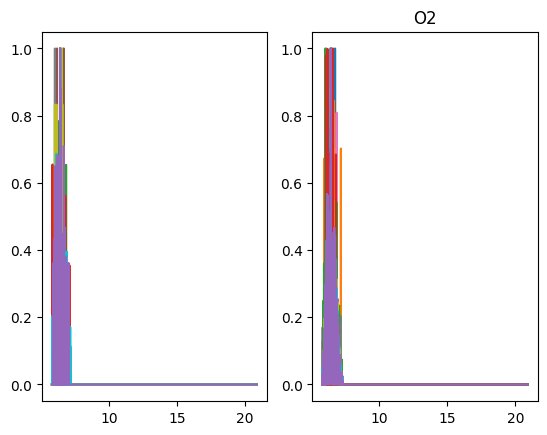

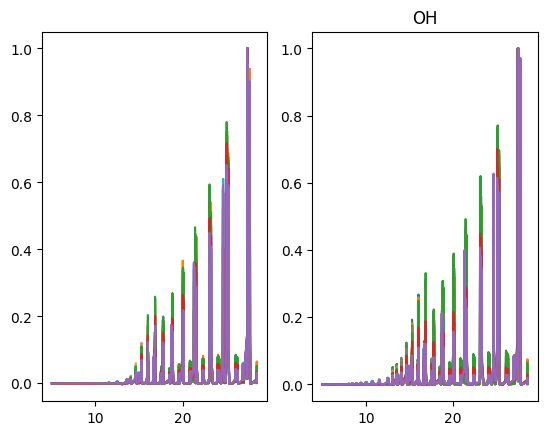

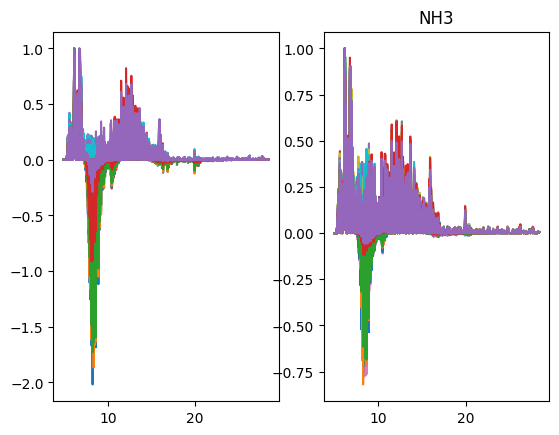

In [42]:
species = ['C2H2','CH4', 'CO', 'CO2', 'H2O', 'HCN',  'NO', 'O2', 'OH','NH3']
for specie in species:
    fig, axes = plt.subplots(1,2)
    for i in range(25):
        model = df['Model Name'][i]
        specie_wl = df.loc[df['Model Name'] == model, f'FLiTs {specie} Wavelength'].values[0].copy()
        specie_flux = df.loc[df['Model Name'] == model, f'FLiTs {specie} Flux'].values[0].copy()
        axes[0].plot(specie_wl, specie_flux/max(specie_flux))
    a=1
    # plt.xlim(13,13.5)
    plt.title(specie)
    plt.show()

In [10]:
data = []
species = ['atomic', 'CH4', 'CO', 'CO2', 'H2O', 'HCN', 'NH3', 'NO', 'O2', 'OH']
for i, row in df.iterrows():
    fluxes = []
    for specie in species:
        fluxes.append(total_flux(row[f'FLiTs {specie} Wavelength'], row[f'FLiTs {specie} Flux']))
    data.append(fluxes)
df_FLiTs_flux = pd.DataFrame(data, columns=species)


In [14]:
ref_peaks, _ = find_peaks(NH3_flux)
test_peaks, _ = find_peaks(totalFlux)


In [19]:
tolerance = 0.001  # wavelength units

matched = []
for r in ref_peaks:
    ref_wave = FLiTs_wl[r]
    for t in test_peaks:
        test_wave = FLiTs_wl[t]
        if abs(ref_wave - test_wave) <= tolerance:
            matched.append((ref_wave, test_wave))
            break  # Avoid double-matching


In [20]:
print(f"Matched {len(matched)} of {len(ref_peaks)} reference peaks.")


Matched 566 of 3357 reference peaks.


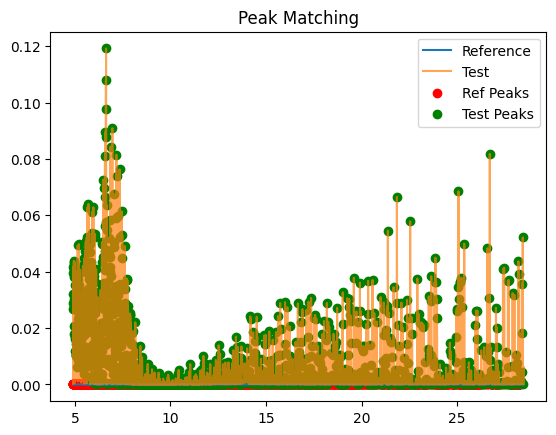

In [21]:
plt.plot(FLiTs_wl, NH3_flux, label='Reference')
plt.plot(FLiTs_wl, totalFlux, label='Test', alpha=0.7)
plt.scatter(FLiTs_wl[ref_peaks], NH3_flux[ref_peaks], color='red', label='Ref Peaks')
plt.scatter(FLiTs_wl[test_peaks], totalFlux[test_peaks], color='green', label='Test Peaks')
plt.legend()
plt.title("Peak Matching")
plt.show()


In [48]:
data = []
species = ['atomic', 'CH4', 'CO', 'CO2', 'H2O', 'HCN', 'NH3', 'NO', 'O2', 'OH']
for i, row in df.iterrows():
    fluxes = []
    for specie in species:
        fluxes.append(total_flux(row[f'FLiTs {specie} Wavelength'], row[f'FLiTs {specie} Flux']))
    data.append(fluxes)
df_FLiTs_flux = pd.DataFrame(data, columns=species)
print(df_FLiTs_flux)

          atomic           CH4            CO           CO2           H2O  \
0   7.479708e-15  4.877943e-17  5.771112e-13  1.166385e-14  3.222066e-12   
1   1.192786e-14  4.049405e-17  6.584515e-13  2.472750e-14  6.466183e-12   
2   1.229322e-14  2.850269e-17  7.159074e-13  4.030173e-14  8.828134e-12   
3   1.401599e-14  1.577024e-17  7.884372e-13  6.193433e-14  1.143584e-11   
4   7.854032e-15  6.071154e-18  8.497314e-13  9.515077e-14  1.129440e-11   
5   1.161335e-14  7.151217e-17  5.826977e-13  8.175568e-15  2.523988e-12   
6   7.737988e-15  5.668986e-17  6.844452e-13  3.016163e-14  3.857254e-12   
7   1.192691e-14  4.225535e-17  7.376856e-13  6.262205e-14  7.654238e-12   
8   1.356214e-14  2.277206e-17  7.986946e-13  1.027196e-13  1.039002e-11   
9   1.165193e-14  8.502495e-18  8.689227e-13  1.593780e-13  1.335518e-11   
10  1.037775e-14  2.502220e-16  8.807906e-13  1.897842e-17  7.481088e-14   
11  1.173054e-14  1.692626e-16  5.648054e-13  1.934740e-14  2.954163e-12   
12  7.881810

In [49]:
target_column = 'NH3'

In [107]:
X = df_FLiTs_flux.drop(columns=[target_column])
y = df_FLiTs_flux[target_column]

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
model = LinearRegression()

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Predict the flux for the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model (e.g., Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {np.sqrt(mse)}")

# Step 6: Output predictions and true values
print("\nPredictions vs True values:")
for true, pred in zip(y_test, y_pred):
    print(f"True: {true}, Predicted: {pred  }")

Mean Squared Error: 6.724535565894633e-16

Predictions vs True values:
True: 5.540780809838939e-15, Predicted: 4.7836313375602115e-15
True: 3.874049036295888e-15, Predicted: 4.406329029450669e-15
True: 4.291595495977272e-15, Predicted: 5.311919886685249e-15
True: 5.150985647433523e-15, Predicted: 5.368808848555419e-15
True: 4.882869590429442e-15, Predicted: 4.3208528601235824e-15
